In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation, rc
from IPython.display import HTML

In [ ]:
def f(x, y, L=0.3):
  return(1-(x/2)+x**5+y**3)*np.exp(-x**2-y**2)+L*(np.abs(x)+np.abs(y))

In [ ]:
def derivativeX(x, y, h=0.001):
  return (f(x+h,y)-f(x-h,y))/(2*h)
def derivativeY(x, y, h=0.001):
  return (f(x,y+h)-f(x,y-h))/(2*h)

In [30]:
def tolerance(x, x0, t=0.05):
  return np.abs(x-x0)<t

In [43]:
n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)

XX, YY = np.meshgrid(x,y)

fig, ax = plt.subplots()
plt.close()
ax.set_xlim((-3, 3))
ax.set_ylim((-3, 3))


conf = ax.contourf(XX, YY, f(XX, YY), 8, alpha=0.75, cmap=plt.cm.jet)

con = ax.contour(XX, YY, f(XX, YY), 10, colors=['black'])

ax.clabel(con, inline=True, fontsize=15)

dot, = ax.plot([], [], 'ro')

eta = 0.04
beta = 0.968

w0, w1 = -3,1.2
v0 = w0*eta
v1 = w1*eta

wp0, vp0 = w0, v0
wp1, vp1 = w1, v1

def init():
  global w0, w1
  dot.set_data(w0, w1)
  return dot,

def animate(_):
  global w0, w1, v0, v1
  wp0, vp0 = w0, v0
  v0 = beta*vp0 + eta*derivativeX(w0, w1)
  wp1, vp1 = w1, v1
  v1 = beta*vp1 + eta*derivativeY(w0, w1)

  w0 = wp0-v0
  w1 = wp1-v1
  dot.set_data(w0, w1)
  return dot,


anim = animation.FuncAnimation(fig, animate, init_func=init, frames=200, interval=100, blit=True)
rc('animation', html='jshtml')
anim


Output hidden; open in https://colab.research.google.com to view.

In [37]:
print(f(w0,w1))

-0.17340733660288077


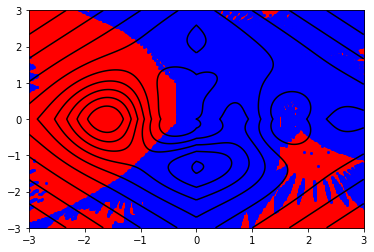

In [42]:
n = 255
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)

XX, YY = np.meshgrid(x,y)

aX = []
aY = []
bX = []
bY = []

fig, ax = plt.subplots()

ax.set_xlim((-3, 3))
ax.set_ylim((-3, 3))

#conf = ax.contourf(XX, YY, f(XX, YY), 8, alpha=0.75, cmap=plt.cm.jet)


ax.clabel(con, inline=True, fontsize=15)

dot, = ax.plot([], [], 'ro')

eta = 0.04
beta = 0.968

for ix in x:
  for iy in y:
    w0, w1 = ix, iy
    v0 = w0*eta
    v1 = w1*eta


    for i in range(200):
      wp0, vp0 = w0, v0
      v0 = beta*vp0 + eta*derivativeX(w0, w1)
      wp1, vp1 = w1, v1
      v1 = beta*vp1 + eta*derivativeY(w0, w1)

      w0 = wp0-v0
      w1 = wp1-v1
    
    if tolerance(f(w0,w1),-0.17):
      aX.append(ix)
      aY.append(iy)
    else:
      bX.append(ix)
      bY.append(iy)


ax.plot(aX,aY,'o',markersize=2, alpha=1, color='red')
ax.plot(bX,bY,'o',markersize=2, alpha=1, color='blue')
con = ax.contour(XX, YY, f(XX, YY), 10, colors=['black'], zorder=10)

plt.show()